## Предсказываем внутренность дома с поворотами и сдвигами
Используем модель из Experiment_2017_11_19_11 и доучиваем ее еще 60 эпох на lr=1e-5

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF

def get_session(gpu_fraction=0.3):
    '''Assume that you have 6GB of GPU memory and want to allocate ~2GB'''

    num_threads = os.environ.get('OMP_NUM_THREADS')
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)

    if num_threads:
        return tf.Session(config=tf.ConfigProto(
            gpu_options=gpu_options, intra_op_parallelism_threads=num_threads))
    else:
        return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


KTF.set_session(get_session())

Using TensorFlow backend.


In [1]:
!nvidia-smi

Sun Nov 19 11:38:43 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.90                 Driver Version: 384.90                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    71W / 149W |   3608MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random
import copy

import datetime

from shutil import copyfile
import os
import json

In [6]:
DESCRIPTION = """Предсказываем внутренность дома на 60 эпохах.
Используем ранее выученную модель Experiment_2017_11_19_11
Уменьшаем lr до 1e-5
Experiment_2017_11_19_12
"""

DATE = str(datetime.datetime.now())

DIR = './experiments/%s' % DATE

os.mkdir(DIR)

json.dump(DESCRIPTION, open(DIR + "/description.txt", "w"))
MODULES = ['dataset', 'unet', 'train_test_loader']

for m in MODULES:
    fname = "%s.py" % m
    copyfile(fname, DIR + '/' + fname)

[s, u, train_test_loader] = map(__import__, MODULES)

In [19]:
DIR

'./experiments/2017-11-19 10:20:13.639391'

In [7]:
data_set = s.DataSet("./dataset/trainset", [s.ChannelPAN], image_size=(240,240))
ids = data_set.load()

train_ids, test_ids = train_test_loader.load_train_test()

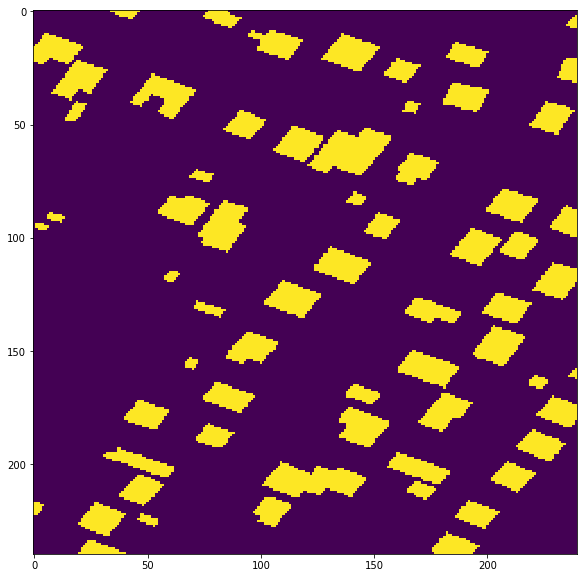

In [8]:
plt.figure(figsize=(10,10))
arr = data_set.get_mask(train_ids[3])
plt.imshow(arr)

In [9]:
net = u.UnetModel('classic-unet', data_set, DIR + "/model", lr=1e-5)

In [10]:
batch_generator = u.BatchGenerator(data_set, train_ids, random_rotate=True, shuffle_on_each_epoch=True, random_translate=True)

In [16]:
!ls ./experiments/2017-11-19\ 09\:12\:47.022349/model

0   12	16  2	23  27	30  34	38  41	45  49	52  56	6  history.json
1   13	17  20	24  28	31  35	39  42	46  5	53  57	7
10  14	18  21	25  29	32  36	4   43	47  50	54  58	8
11  15	19  22	26  3	33  37	40  44	48  51	55  59	9


In [17]:
net.load_weights('./experiments/2017-11-19 09:12:47.022349/model/59')

In [18]:
net.u_history = json.load(open('./experiments/2017-11-19 09:12:47.022349/model/history.json', 'r'))

In [20]:
net.train(batch_generator, epochs=60, batch_size=10)

epoch: 60, loss: 0.108831
epoch: 60, loss: 0.096833
epoch: 60, loss: 0.123102
epoch: 60, loss: 0.074362
epoch: 60, loss: 0.147792
epoch: 60, loss: 0.088855
epoch: 60, loss: 0.088672
epoch: 60, loss: 0.116301
epoch: 60, loss: 0.099239
epoch: 60, loss: 0.075697
epoch: 60, loss: 0.118796
epoch: 60, loss: 0.045099
epoch: 60, loss: 0.148701
epoch: 60, loss: 0.072361
epoch: 60, loss: 0.144059
epoch: 60, loss: 0.051955
epoch: 60, loss: 0.088490
epoch: 60, loss: 0.058981
epoch: 60, loss: 0.078062
epoch: 60, loss: 0.084637
epoch: 60, loss: 0.081803
epoch: 60, loss: 0.121902
epoch: 60, loss: 0.116937
epoch: 60, loss: 0.100746
epoch: 60, loss: 0.071487
epoch: 60, loss: 0.122614
epoch: 60, loss: 0.129268
epoch: 60, loss: 0.097910
epoch: 60, loss: 0.050371
epoch: 60, loss: 0.089462
epoch: 60, loss: 0.061303
epoch: 60, loss: 0.161101
epoch: 60, loss: 0.094998
epoch: 60, loss: 0.088262
epoch: 60, loss: 0.100440
epoch: 60, loss: 0.066530
epoch: 60, loss: 0.136372
epoch: 60, loss: 0.162481
epoch: 60, l

epoch: 64, loss: 0.069127
epoch: 64, loss: 0.219334
epoch: 64, loss: 0.096770
epoch: 64, loss: 0.121309
epoch: 64, loss: 0.054374
epoch: 64, loss: 0.056630
epoch: 64, loss: 0.127492
epoch: 64, loss: 0.100853
epoch: 64, loss: 0.058891
epoch: 65, loss: 0.131610
epoch: 65, loss: 0.110846
epoch: 65, loss: 0.103132
epoch: 65, loss: 0.044980
epoch: 65, loss: 0.105549
epoch: 65, loss: 0.043641
epoch: 65, loss: 0.108925
epoch: 65, loss: 0.097026
epoch: 65, loss: 0.127492
epoch: 65, loss: 0.087523
epoch: 65, loss: 0.086539
epoch: 65, loss: 0.088944
epoch: 65, loss: 0.140635
epoch: 65, loss: 0.077221
epoch: 65, loss: 0.122530
epoch: 65, loss: 0.075548
epoch: 65, loss: 0.144246
epoch: 65, loss: 0.084591
epoch: 65, loss: 0.089696
epoch: 65, loss: 0.126243
epoch: 65, loss: 0.090360
epoch: 65, loss: 0.113216
epoch: 65, loss: 0.067144
epoch: 65, loss: 0.108212
epoch: 65, loss: 0.078749
epoch: 65, loss: 0.100958
epoch: 65, loss: 0.128400
epoch: 65, loss: 0.068308
epoch: 65, loss: 0.097294
epoch: 65, l

epoch: 69, loss: 0.105110
epoch: 69, loss: 0.066267
epoch: 69, loss: 0.081898
epoch: 69, loss: 0.075646
epoch: 69, loss: 0.093857
epoch: 69, loss: 0.051329
epoch: 69, loss: 0.048014
epoch: 69, loss: 0.127103
epoch: 69, loss: 0.068508
epoch: 69, loss: 0.099855
epoch: 69, loss: 0.133809
epoch: 69, loss: 0.168657
epoch: 69, loss: 0.041650
epoch: 69, loss: 0.174397
epoch: 69, loss: 0.059053
epoch: 69, loss: 0.084278
epoch: 69, loss: 0.041626
epoch: 69, loss: 0.022384
epoch: 70, loss: 0.043608
epoch: 70, loss: 0.116593
epoch: 70, loss: 0.066106
epoch: 70, loss: 0.111555
epoch: 70, loss: 0.091286
epoch: 70, loss: 0.047507
epoch: 70, loss: 0.045539
epoch: 70, loss: 0.077493
epoch: 70, loss: 0.183812
epoch: 70, loss: 0.105730
epoch: 70, loss: 0.102490
epoch: 70, loss: 0.098878
epoch: 70, loss: 0.140223
epoch: 70, loss: 0.119800
epoch: 70, loss: 0.143660
epoch: 70, loss: 0.065757
epoch: 70, loss: 0.056088
epoch: 70, loss: 0.114797
epoch: 70, loss: 0.104045
epoch: 70, loss: 0.118111
epoch: 70, l

epoch: 74, loss: 0.042845
epoch: 74, loss: 0.106160
epoch: 74, loss: 0.098819
epoch: 74, loss: 0.080296
epoch: 74, loss: 0.084023
epoch: 74, loss: 0.128508
epoch: 74, loss: 0.053412
epoch: 74, loss: 0.083530
epoch: 74, loss: 0.049803
epoch: 74, loss: 0.062825
epoch: 74, loss: 0.102426
epoch: 74, loss: 0.052022
epoch: 74, loss: 0.042024
epoch: 74, loss: 0.065492
epoch: 74, loss: 0.098332
epoch: 74, loss: 0.045828
epoch: 74, loss: 0.146177
epoch: 74, loss: 0.075600
epoch: 74, loss: 0.100400
epoch: 74, loss: 0.146147
epoch: 74, loss: 0.082919
epoch: 74, loss: 0.058929
epoch: 74, loss: 0.116709
epoch: 74, loss: 0.086385
epoch: 74, loss: 0.055263
epoch: 74, loss: 0.148041
epoch: 74, loss: 0.210569
epoch: 75, loss: 0.109298
epoch: 75, loss: 0.105016
epoch: 75, loss: 0.214362
epoch: 75, loss: 0.102978
epoch: 75, loss: 0.066577
epoch: 75, loss: 0.116097
epoch: 75, loss: 0.141157
epoch: 75, loss: 0.057542
epoch: 75, loss: 0.074459
epoch: 75, loss: 0.059801
epoch: 75, loss: 0.150169
epoch: 75, l

epoch: 79, loss: 0.038394
epoch: 79, loss: 0.094651
epoch: 79, loss: 0.039950
epoch: 79, loss: 0.119989
epoch: 79, loss: 0.022853
epoch: 79, loss: 0.083040
epoch: 79, loss: 0.097089
epoch: 79, loss: 0.089018
epoch: 79, loss: 0.082726
epoch: 79, loss: 0.071714
epoch: 79, loss: 0.083995
epoch: 79, loss: 0.185922
epoch: 79, loss: 0.098533
epoch: 79, loss: 0.105948
epoch: 79, loss: 0.086249
epoch: 79, loss: 0.082702
epoch: 79, loss: 0.123878
epoch: 79, loss: 0.070396
epoch: 79, loss: 0.093001
epoch: 79, loss: 0.042349
epoch: 79, loss: 0.169968
epoch: 79, loss: 0.128804
epoch: 79, loss: 0.069863
epoch: 79, loss: 0.088314
epoch: 79, loss: 0.101427
epoch: 79, loss: 0.076884
epoch: 79, loss: 0.079045
epoch: 79, loss: 0.028680
epoch: 79, loss: 0.107180
epoch: 79, loss: 0.108268
epoch: 79, loss: 0.048206
epoch: 79, loss: 0.150056
epoch: 79, loss: 0.047236
epoch: 79, loss: 0.059647
epoch: 79, loss: 0.106143
epoch: 79, loss: 0.117350
epoch: 80, loss: 0.101443
epoch: 80, loss: 0.088728
epoch: 80, l

epoch: 84, loss: 0.066442
epoch: 84, loss: 0.111306
epoch: 84, loss: 0.055820
epoch: 84, loss: 0.059392
epoch: 84, loss: 0.097732
epoch: 84, loss: 0.078894
epoch: 84, loss: 0.082562
epoch: 84, loss: 0.051313
epoch: 84, loss: 0.117667
epoch: 84, loss: 0.154224
epoch: 84, loss: 0.072222
epoch: 84, loss: 0.091065
epoch: 84, loss: 0.134630
epoch: 84, loss: 0.051468
epoch: 84, loss: 0.023160
epoch: 84, loss: 0.110007
epoch: 84, loss: 0.032493
epoch: 84, loss: 0.098250
epoch: 84, loss: 0.079106
epoch: 84, loss: 0.123058
epoch: 84, loss: 0.120568
epoch: 84, loss: 0.094896
epoch: 84, loss: 0.102019
epoch: 84, loss: 0.084856
epoch: 84, loss: 0.086959
epoch: 84, loss: 0.088690
epoch: 84, loss: 0.030703
epoch: 84, loss: 0.087971
epoch: 84, loss: 0.064981
epoch: 84, loss: 0.094058
epoch: 84, loss: 0.074585
epoch: 84, loss: 0.145334
epoch: 84, loss: 0.047722
epoch: 84, loss: 0.078338
epoch: 84, loss: 0.087550
epoch: 84, loss: 0.055014
epoch: 84, loss: 0.089512
epoch: 84, loss: 0.093799
epoch: 84, l

epoch: 89, loss: 0.064560
epoch: 89, loss: 0.095902
epoch: 89, loss: 0.031082
epoch: 89, loss: 0.107152
epoch: 89, loss: 0.063692
epoch: 89, loss: 0.053029
epoch: 89, loss: 0.072298
epoch: 89, loss: 0.070313
epoch: 89, loss: 0.084310
epoch: 89, loss: 0.104095
epoch: 89, loss: 0.127174
epoch: 89, loss: 0.047811
epoch: 89, loss: 0.087632
epoch: 89, loss: 0.107253
epoch: 89, loss: 0.134585
epoch: 89, loss: 0.061201
epoch: 89, loss: 0.061732
epoch: 89, loss: 0.084241
epoch: 89, loss: 0.081124
epoch: 89, loss: 0.062380
epoch: 89, loss: 0.086215
epoch: 89, loss: 0.111732
epoch: 89, loss: 0.027238
epoch: 89, loss: 0.079851
epoch: 89, loss: 0.057912
epoch: 89, loss: 0.076591
epoch: 89, loss: 0.045154
epoch: 89, loss: 0.120241
epoch: 89, loss: 0.073346
epoch: 89, loss: 0.098348
epoch: 89, loss: 0.078537
epoch: 89, loss: 0.082760
epoch: 89, loss: 0.110246
epoch: 89, loss: 0.065439
epoch: 89, loss: 0.063564
epoch: 89, loss: 0.063757
epoch: 89, loss: 0.073670
epoch: 89, loss: 0.078125
epoch: 89, l

epoch: 94, loss: 0.111475
epoch: 94, loss: 0.080476
epoch: 94, loss: 0.089935
epoch: 94, loss: 0.051743
epoch: 94, loss: 0.076503
epoch: 94, loss: 0.040593
epoch: 94, loss: 0.087079
epoch: 94, loss: 0.158881
epoch: 94, loss: 0.073953
epoch: 94, loss: 0.054914
epoch: 94, loss: 0.053352
epoch: 94, loss: 0.080578
epoch: 94, loss: 0.066480
epoch: 94, loss: 0.108828
epoch: 94, loss: 0.176330
epoch: 94, loss: 0.092573
epoch: 94, loss: 0.106569
epoch: 94, loss: 0.076217
epoch: 94, loss: 0.079554
epoch: 94, loss: 0.089817
epoch: 94, loss: 0.096458
epoch: 94, loss: 0.088408
epoch: 94, loss: 0.051748
epoch: 94, loss: 0.072232
epoch: 94, loss: 0.047562
epoch: 94, loss: 0.131257
epoch: 94, loss: 0.089263
epoch: 94, loss: 0.098316
epoch: 94, loss: 0.074700
epoch: 94, loss: 0.078421
epoch: 94, loss: 0.111931
epoch: 94, loss: 0.089239
epoch: 94, loss: 0.094275
epoch: 94, loss: 0.069677
epoch: 94, loss: 0.089182
epoch: 94, loss: 0.040299
epoch: 94, loss: 0.036808
epoch: 94, loss: 0.074230
epoch: 94, l

epoch: 98, loss: 0.064637
epoch: 98, loss: 0.034357
epoch: 98, loss: 0.075253
epoch: 98, loss: 0.028886
epoch: 98, loss: 0.107429
epoch: 98, loss: 0.041255
epoch: 98, loss: 0.061676
epoch: 99, loss: 0.049438
epoch: 99, loss: 0.081013
epoch: 99, loss: 0.043685
epoch: 99, loss: 0.124232
epoch: 99, loss: 0.086820
epoch: 99, loss: 0.061733
epoch: 99, loss: 0.016979
epoch: 99, loss: 0.089491
epoch: 99, loss: 0.149510
epoch: 99, loss: 0.113924
epoch: 99, loss: 0.121446
epoch: 99, loss: 0.121084
epoch: 99, loss: 0.050889
epoch: 99, loss: 0.066353
epoch: 99, loss: 0.072793
epoch: 99, loss: 0.086538
epoch: 99, loss: 0.051313
epoch: 99, loss: 0.047257
epoch: 99, loss: 0.069756
epoch: 99, loss: 0.083590
epoch: 99, loss: 0.091414
epoch: 99, loss: 0.047274
epoch: 99, loss: 0.067719
epoch: 99, loss: 0.033855
epoch: 99, loss: 0.055943
epoch: 99, loss: 0.085692
epoch: 99, loss: 0.061382
epoch: 99, loss: 0.077681
epoch: 99, loss: 0.054465
epoch: 99, loss: 0.106109
epoch: 99, loss: 0.116613
epoch: 99, l

epoch: 103, loss: 0.069925
epoch: 103, loss: 0.041909
epoch: 103, loss: 0.118358
epoch: 103, loss: 0.045304
epoch: 103, loss: 0.087634
epoch: 103, loss: 0.068274
epoch: 103, loss: 0.058759
epoch: 103, loss: 0.094340
epoch: 103, loss: 0.088178
epoch: 103, loss: 0.076424
epoch: 103, loss: 0.087306
epoch: 103, loss: 0.055279
epoch: 103, loss: 0.048675
epoch: 103, loss: 0.064951
epoch: 103, loss: 0.025938
epoch: 103, loss: 0.053150
epoch: 103, loss: 0.163061
epoch: 103, loss: 0.053508
epoch: 103, loss: 0.048664
epoch: 103, loss: 0.101970
epoch: 103, loss: 0.099730
epoch: 103, loss: 0.093843
epoch: 103, loss: 0.090355
epoch: 103, loss: 0.066424
epoch: 103, loss: 0.142649
epoch: 104, loss: 0.105081
epoch: 104, loss: 0.111086
epoch: 104, loss: 0.043974
epoch: 104, loss: 0.073488
epoch: 104, loss: 0.063453
epoch: 104, loss: 0.086664
epoch: 104, loss: 0.089633
epoch: 104, loss: 0.030258
epoch: 104, loss: 0.059634
epoch: 104, loss: 0.095497
epoch: 104, loss: 0.062124
epoch: 104, loss: 0.106970
e

epoch: 108, loss: 0.060002
epoch: 108, loss: 0.073826
epoch: 108, loss: 0.036943
epoch: 108, loss: 0.030564
epoch: 108, loss: 0.115977
epoch: 108, loss: 0.054693
epoch: 108, loss: 0.072526
epoch: 108, loss: 0.116461
epoch: 108, loss: 0.084705
epoch: 108, loss: 0.103849
epoch: 108, loss: 0.038408
epoch: 108, loss: 0.073934
epoch: 108, loss: 0.068674
epoch: 108, loss: 0.084304
epoch: 108, loss: 0.054863
epoch: 108, loss: 0.075351
epoch: 108, loss: 0.055851
epoch: 108, loss: 0.093784
epoch: 108, loss: 0.046034
epoch: 108, loss: 0.043256
epoch: 108, loss: 0.039044
epoch: 108, loss: 0.078275
epoch: 108, loss: 0.070645
epoch: 108, loss: 0.071694
epoch: 108, loss: 0.076483
epoch: 108, loss: 0.098659
epoch: 108, loss: 0.064729
epoch: 108, loss: 0.129050
epoch: 108, loss: 0.125882
epoch: 108, loss: 0.037761
epoch: 108, loss: 0.083833
epoch: 108, loss: 0.053109
epoch: 108, loss: 0.065480
epoch: 108, loss: 0.093878
epoch: 108, loss: 0.079236
epoch: 108, loss: 0.045827
epoch: 108, loss: 0.123155
e

epoch: 112, loss: 0.121851
epoch: 112, loss: 0.016209
epoch: 113, loss: 0.060355
epoch: 113, loss: 0.088862
epoch: 113, loss: 0.101599
epoch: 113, loss: 0.037673
epoch: 113, loss: 0.100212
epoch: 113, loss: 0.094228
epoch: 113, loss: 0.132359
epoch: 113, loss: 0.075130
epoch: 113, loss: 0.039009
epoch: 113, loss: 0.104298
epoch: 113, loss: 0.045761
epoch: 113, loss: 0.041972
epoch: 113, loss: 0.087297
epoch: 113, loss: 0.051162
epoch: 113, loss: 0.024304
epoch: 113, loss: 0.028740
epoch: 113, loss: 0.055970
epoch: 113, loss: 0.056496
epoch: 113, loss: 0.064113
epoch: 113, loss: 0.090331
epoch: 113, loss: 0.063117
epoch: 113, loss: 0.126424
epoch: 113, loss: 0.084430
epoch: 113, loss: 0.106355
epoch: 113, loss: 0.075207
epoch: 113, loss: 0.022776
epoch: 113, loss: 0.113626
epoch: 113, loss: 0.128042
epoch: 113, loss: 0.074826
epoch: 113, loss: 0.113167
epoch: 113, loss: 0.056214
epoch: 113, loss: 0.080976
epoch: 113, loss: 0.076755
epoch: 113, loss: 0.065657
epoch: 113, loss: 0.057599
e

epoch: 117, loss: 0.086915
epoch: 117, loss: 0.056963
epoch: 117, loss: 0.036488
epoch: 117, loss: 0.076894
epoch: 117, loss: 0.066998
epoch: 117, loss: 0.100905
epoch: 117, loss: 0.062056
epoch: 117, loss: 0.041911
epoch: 117, loss: 0.083591
epoch: 117, loss: 0.039690
epoch: 117, loss: 0.086579
epoch: 117, loss: 0.036611
epoch: 117, loss: 0.065300
epoch: 117, loss: 0.071499
epoch: 117, loss: 0.040291
epoch: 117, loss: 0.133779
epoch: 117, loss: 0.084548
epoch: 117, loss: 0.046908
epoch: 117, loss: 0.068601
epoch: 117, loss: 0.023760
epoch: 117, loss: 0.094179
epoch: 117, loss: 0.053558
epoch: 117, loss: 0.095028
epoch: 118, loss: 0.095774
epoch: 118, loss: 0.105054
epoch: 118, loss: 0.028874
epoch: 118, loss: 0.056777
epoch: 118, loss: 0.063473
epoch: 118, loss: 0.053566
epoch: 118, loss: 0.048093
epoch: 118, loss: 0.035234
epoch: 118, loss: 0.053350
epoch: 118, loss: 0.065751
epoch: 118, loss: 0.063716
epoch: 118, loss: 0.089722
epoch: 118, loss: 0.039062
epoch: 118, loss: 0.072673
e